In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

In [5]:
def envelope_patch(x, curves):
    """
    x: a 1D array of x points
    curves: a tuple of 1D arrays of y points. same number of points as x and corresponding to the same x points.
    """
    curves_array = np.array(curves) # (ncurves, npts)
    topys = curves_array.max(axis=0)
    bottomys = curves_array.min(axis=0)
    bottomys = np.flip(bottomys)
    xflipped = np.flip(x)
    verts = list(zip(x,topys))+list(zip(xflipped,bottomys))
    poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
    return poly

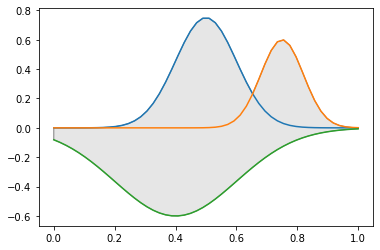

In [6]:
# example with some gaussian curves

x = np.linspace(0.0,1.0)
r1 = .75 * np.exp(-1 * (x - 0.50)**2/(2 * 0.10**2))
r2 = .6  * np.exp(-1 * (x - 0.75)**2/(2 * 0.07**2))
r3 = -.6 * np.exp(-1 * (x - 0.40)**2/(2 * 0.20**2))
curves = (r1, r2, r3)
poly = envelope_patch(x,curves)

fig,ax = plt.subplots()
ax.add_patch(poly)
for curve in curves:
    ax.plot(x,curve)